# Monte carlo blackjack
I programmed basic blackjack sim and tested startegies. Random, hit till 17, basic strategy 

This started as fun project to get to learn about advantages of different rule sets and player strategies, but proved far more time challenging, then anticipated, therefore not fully completed. I will list some things to implement, either now or in future:  
-  DAS/noDAS double after splitting
-  card counter agent (plus general improvements to signaliingin reshuffling)
-  card counter agent with deviations and insurance (insurance never worth w/o cardcounting)
-  scam casino rules (only double on 9 10 11 and such, one card dealt on aces only etc)
-  late surrender and early surrender (early surrender being extremly favorable to player)
-  different blackjack payouts
-  risk of ruin



In [1]:
import random
import blackjack
import matplotlib.pyplot as plt
import numpy as np

Below is Example of one run using hit till 17 strategy. \
Balance is zero because we dont account for chance of ruin and insurance as it is not yet fully implemented.


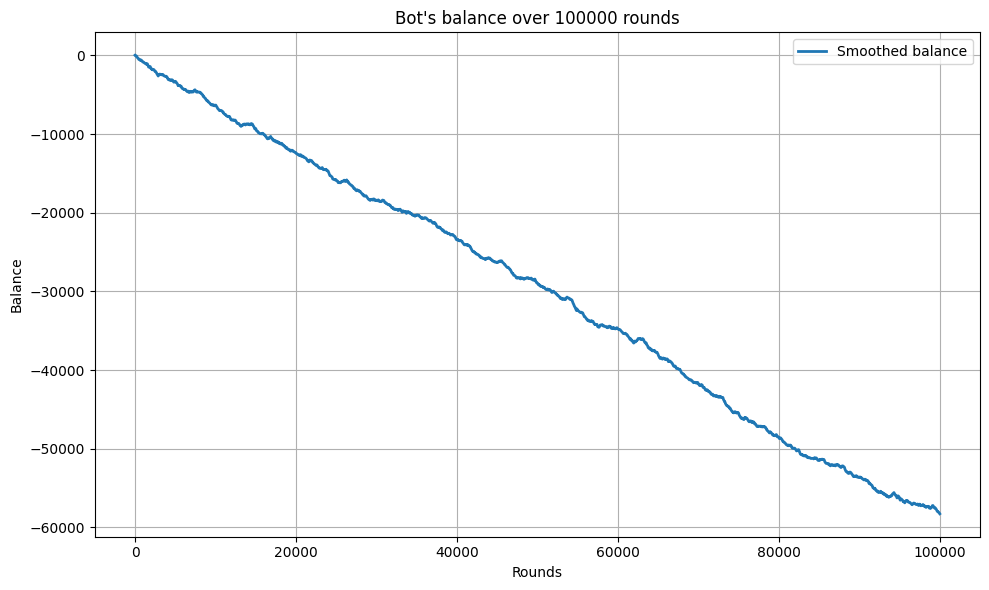

In [2]:
rounds = 100_000
initial_balance = 0  
strategy = "basic"
include_insurance = False

balances = blackjack.botplay(rounds, initial_balance)

# Smoothing the data for better visualization (optional)
smoothed_balances = np.convolve(balances, np.ones(50)/50, mode='valid')

plt.figure(figsize=(10, 6))
#plt.plot(balances, label="Raw balance", alpha=0.7)
plt.plot(smoothed_balances, label="Smoothed balance", linewidth=2)
plt.xlabel("Rounds")
plt.ylabel("Balance")
plt.legend()
plt.title(f"Bot's balance over {rounds} rounds")
plt.grid(True)
plt.tight_layout()
plt.show()


Multiple runs with avg. Not yet monte carlo but cool nevertheless

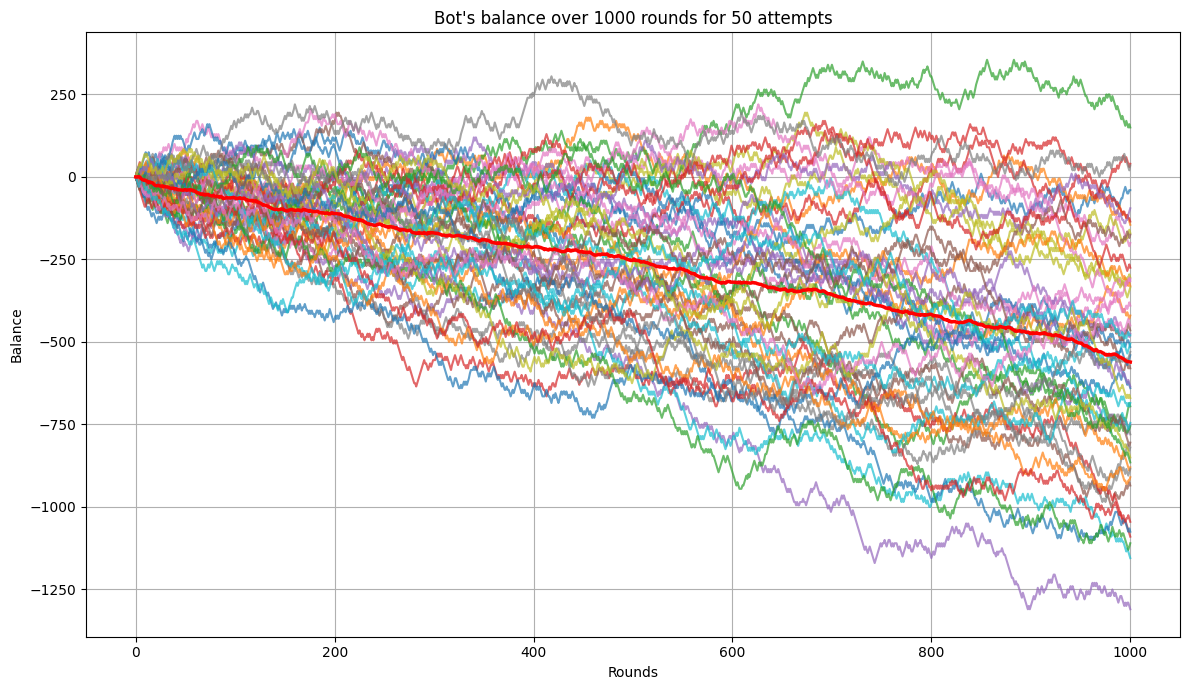

In [4]:

rounds = 1000
num_attempts = 50
betsize = 10
plt.figure(figsize=(12, 7))

all_balances = []

# Simulate multiple attempts and plot them
for attempt in range(num_attempts):
    balances = blackjack.botplay(rounds, initial_balance, betsize, strategy, include_insurance)
    all_balances.append(balances)
    plt.plot(balances, label=f"Attempt {attempt+1}", alpha=0.7)

# Plotting the average line
average_balances = np.mean(all_balances, axis=0)
plt.plot(average_balances, label="Average", color='red', linewidth=2.5)

plt.xlabel("Rounds")
plt.ylabel("Balance")
plt.title(f"Bot's balance over {rounds} rounds for {num_attempts} attempts")
plt.grid(True)
plt.tight_layout()
plt.show()

Monte Carlo for our purposes

In [5]:
 def blackjack_montecarlo(rounds, num_attempts, initial_balance, betsize, strategy, include_insurance):
    final_balances = []
    # Simulate multiple attempts
    for attempt in range(num_attempts):
        final_balance = blackjack.botplay(rounds, initial_balance, betsize, strategy, include_insurance)
        final_balance = final_balance[-1]
        final_balances.append(final_balance)

    # Calculate cumulative averages
    cumulative_averages = np.cumsum(final_balances) / (np.arange(num_attempts) + 1)

    # Visualization
    plt.figure(figsize=(12, 7))

    plt.plot(np.arange(1, num_attempts + 1), cumulative_averages, '-o', color='blue', label="Cumulative Average Balance")
    plt.axhline(np.mean(final_balances), color='red', linewidth=2.5, label="Overall Average Final Balance")

    plt.xlabel("Number of Attempts")
    plt.ylabel("Average Balance")
    plt.title(f"Cumulative Average of Final Balances after {rounds} rounds over {num_attempts} attempts with betsize {betsize} ({np.mean(final_balances)})")
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.tight_layout()
    plt.show()

    #for zero balance
    house_edge = ((rounds * betsize) + np.mean(final_balances)) /200
    print(f"House edge: {100 - house_edge} % ")
    print(f"Bot edge: {house_edge} % ")



RNG strategy

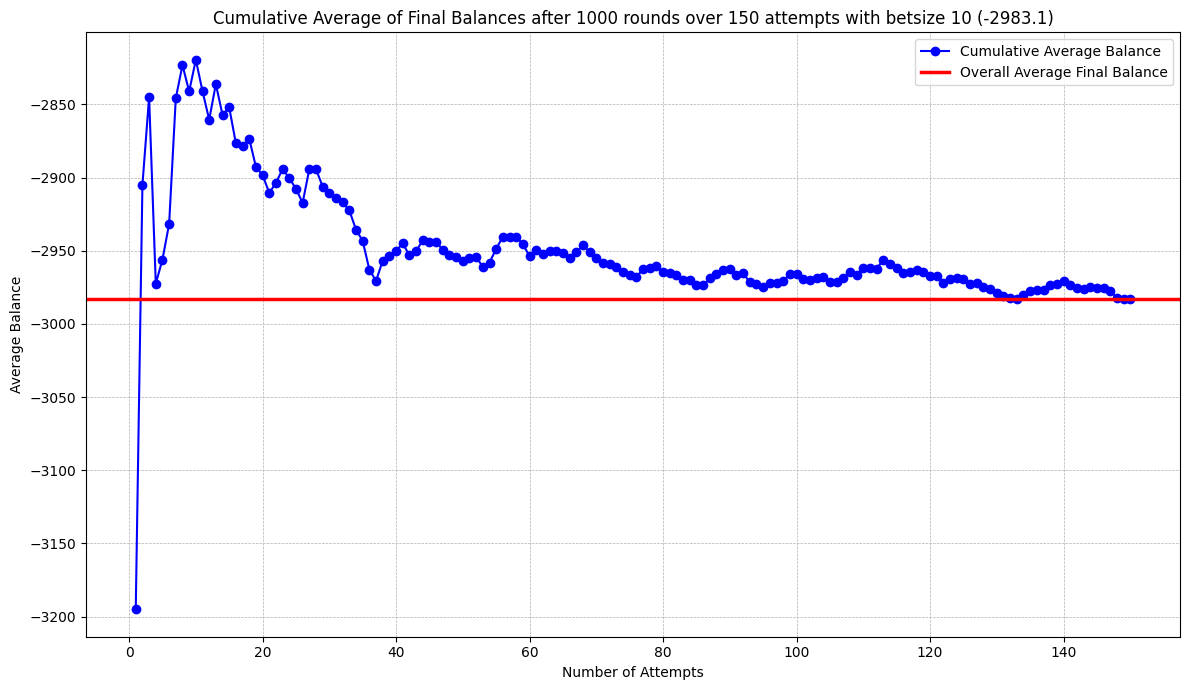

House edge: 64.91550000000001 % 
Bot edge: 35.0845 % 


In [6]:
# Parameters
rounds = 1000
num_attempts = 150
initial_balance = 0
betsize = 10
strategy = "rng"
include_insurance = False 

blackjack_montecarlo(rounds, num_attempts, initial_balance, betsize, strategy, include_insurance)

Only hit

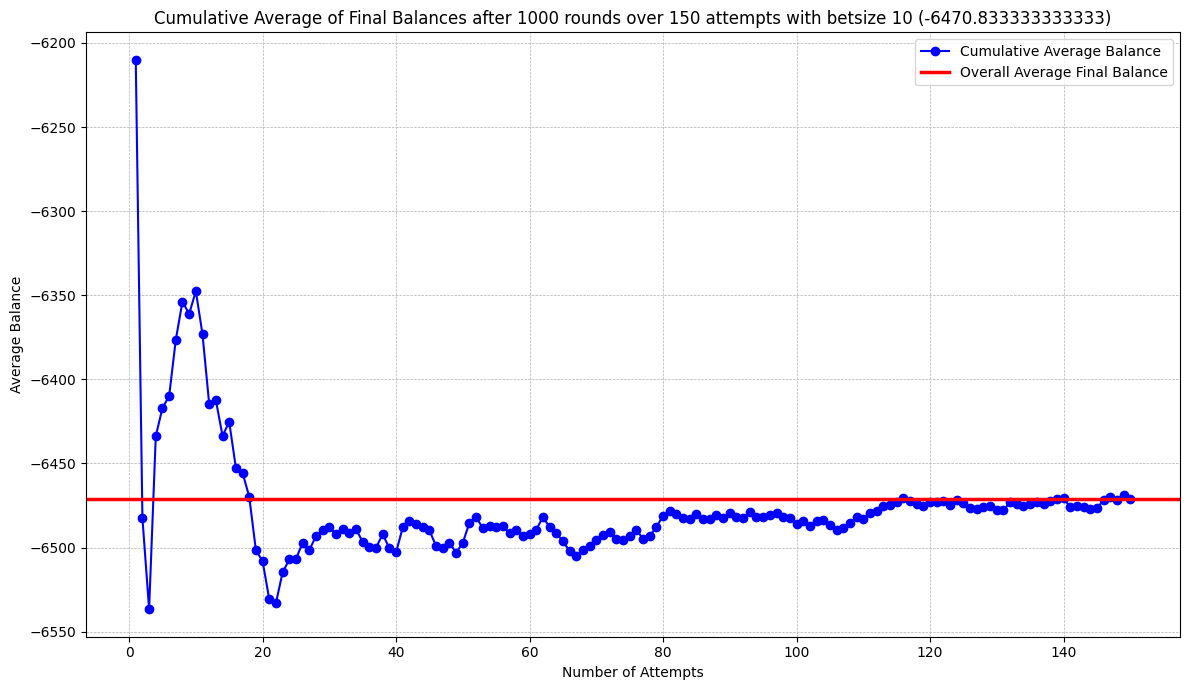

House edge: 82.35416666666666 % 
Bot edge: 17.645833333333336 % 


In [7]:
# Parameters
rounds = 1000
num_attempts = 150
initial_balance = 0
betsize = 10
strategy = "onlyhit"  
include_insurance = False 

final_balances = []

blackjack_montecarlo(rounds, num_attempts, initial_balance, betsize, strategy, include_insurance)

Same as dealer aka hit till 17

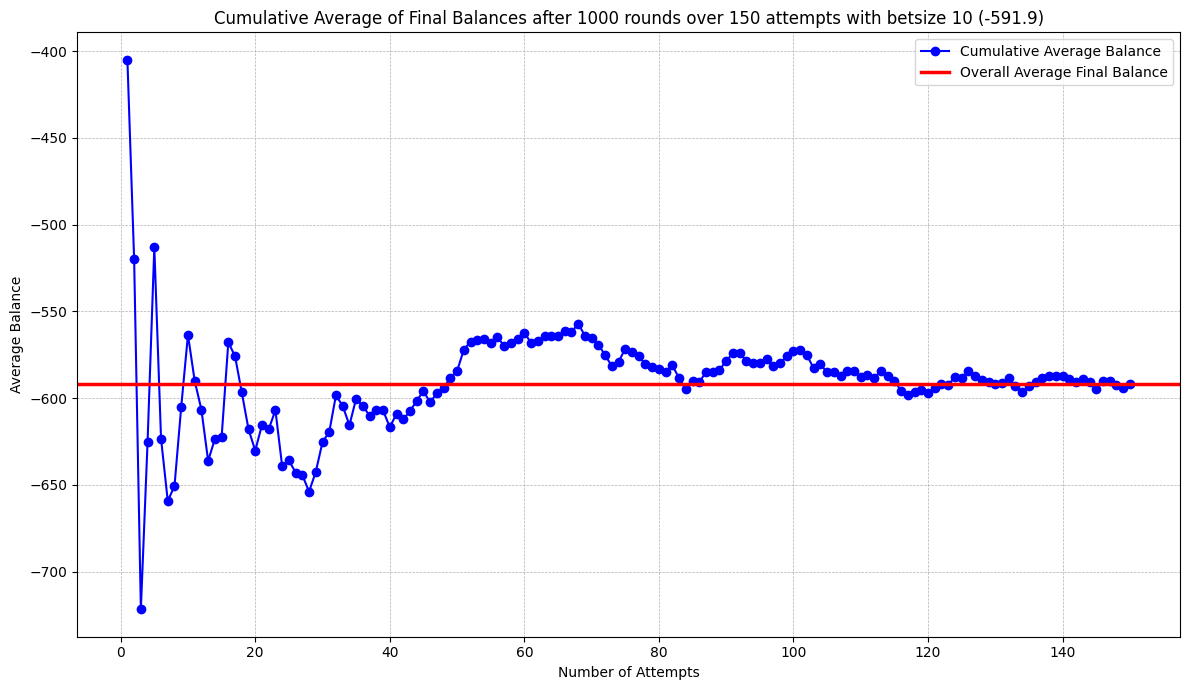

House edge: 52.9595 % 
Bot edge: 47.0405 % 


In [9]:
# Parameters
rounds = 1000
num_attempts = 150
initial_balance = 0
betsize = 10
strategy =  "hittill17"
include_insurance = False  

final_balances = []

blackjack_montecarlo(rounds, num_attempts, initial_balance, betsize, strategy, include_insurance)

Basic strategy Bot \
info on basic strategy and card counting: https://www.casinoguardian.co.uk/blackjack/blackjack-illustrious-18/

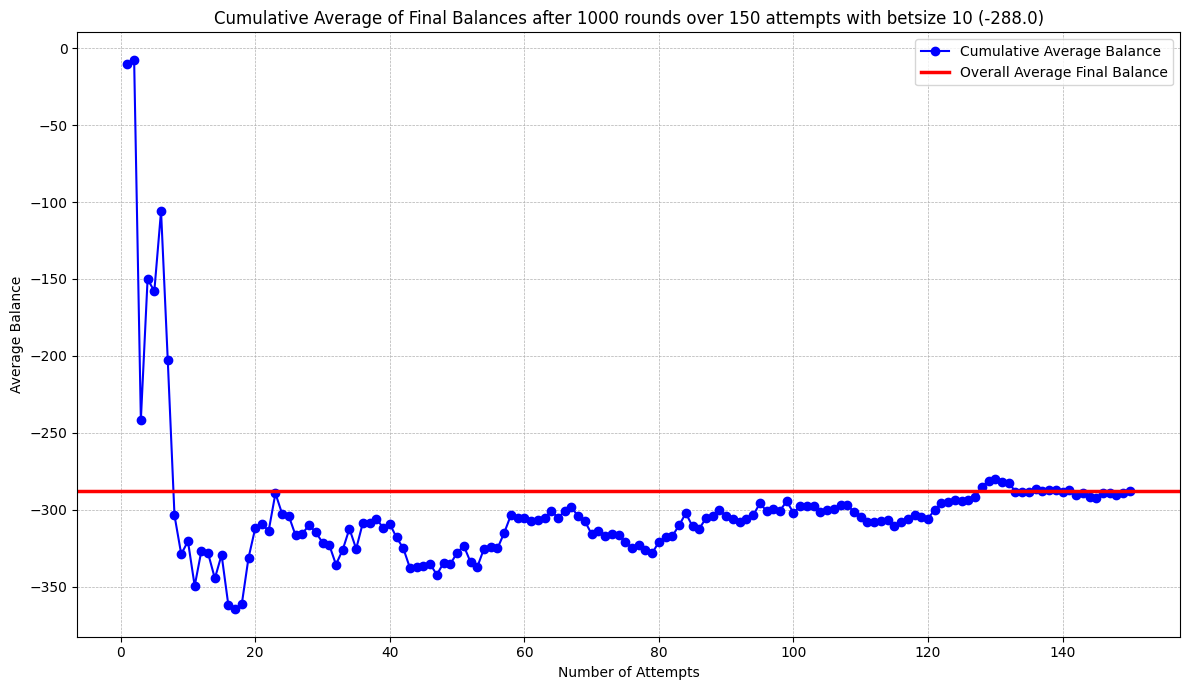

House edge: 51.44 % 
Bot edge: 48.56 % 


In [12]:
# Parameters
rounds = 1000
num_attempts = 150
initial_balance = 0
betsize = 10
strategy = "basic_split"  # Define your strategy here
include_insurance = False  # Set this according to your preference

final_balances = []

blackjack_montecarlo(rounds, num_attempts, initial_balance, betsize, strategy, include_insurance)

Edge is what i pretty much would expect.  
Big cap is sim speed 150 000 hands 45 secs is not that great.  
Next step would be to make cardcounting agent (some infrastructure ready)that could have an edge over house, but next time.